# 第7章 Agent应用与图状态编排框架LangGraph

## 💡 学习目标

1. 掌握 LangGraph 的核心概念和使用场景
2. 掌握 LangGraph 构建 ReAct Agent
3. 掌握 LangGraph 创建自定义工作流
4. 掌握 Memory 与 Persistence

## 1. LangGraph 介绍

### 1.1 基本概述

LangGraph 是由 LangChain 团队开发的一个开源框架，旨在帮助开发者构建基于大型语言模型（LLM）的复杂、有状态、多主体的应用。它通过将工作流表示为图结构（graph），提供了更高的灵活性和控制能力，特别适合需要循环逻辑、状态管理以及多主体协作的场景，比如智能代理（agent）和多代理工作流。

**LangGraph 是为智能体和工作流设计的一套底层编排框架**，旨在构建、部署和管理复杂的生成式 AI 代理工作流。它提供了一套工具和库，使用户能够以可扩展且高效的方式创建、运行和优化大型语言模型(LLM)。LangGraph 的核心是利用基于图的架构的强大功能来建模和管理AI 代理工作流中各个组件之间的复杂关系。

官方文档：https://langchain-ai.github.io/langgraph/

### 1.2 核心概念

**图结构（Graph Structure）**

LangGraph 将应用逻辑组织成一个有向图，其中：

- 节点（Nodes）：代表具体的操作或计算步骤，可以是调用语言模型、执行函数或与外部工具交互等
- 边（Edges）：定义节点之间的连接和执行顺序，支持普通边（直接连接）和条件边（基于条件动态选择下一步）

**状态管理（State Management）**

LangGraph 的核心特点是**自动维护和管理状态**

状态（State）是一个贯穿整个图的共享数据结构，记录了应用运行过程中的上下文信息

每个节点可以根据当前状态执行任务并更新状态，确保系统在多步骤或多主体交互中保持一致性

**循环能力（Cyclical Workflows）**

与传统的线性工作流（如 LangChain 的 LCEL）不同，LangGraph 支持循环逻辑，这使得它非常适合需要反复推理、决策或与用户交互的代理应用。例如，一个代理可以在循环中不断调用语言模型，直到达成目标。

### 1.3 主要特点

**灵活性：** 开发者可以精细控制工作流的逻辑和状态更新，适应复杂的业务需求

**持久性：** 内置支持状态的保存和恢复，便于错误恢复和长时间运行的任务

**多主体协作：** 允许多个代理协同工作，每个代理负责特定任务，通过图结构协调交互

**工具集成：** 可以轻松集成外部工具（如搜索API）或自定义函数，增强代理能力

**人性化交互：** 支持“人机交互”（human-in-the-loop）功能，让人类在关键步骤参与决策

### 1.4 使用场景

LangGraph 特别适用于以下场景： 

**对话代理：** 构建能够记住上下文、动态调整策略的智能聊天机器人             
**多步骤任务：** 处理需要分解为多个阶段的复杂问题，如研究、写作或数据分析                
**多代理系统：** 协调多个代理分工合作，比如一个负责搜索信息、另一个负责总结内容的系统

### 1.5 与 LangChain 的关系

- LangGraph 是 LangChain 生态的一部分，但它是独立于 LangChain 的一个模块             
- LangChain 更擅长处理简单的线性任务链（DAG），而 LangGraph 专注于更复杂的循环和多主体场景           
- 你可以单独使用 LangGraph，也可以结合 LangChain 的组件（如提示模板、工具接口）来增强功能

## 2. 快速开始

### 2.1 创建 ReAct Agent

In [ ]:
# !pip install -U langgraph langchain
# !pip install langchain-community
# !pip install dashscope

In [1]:
from langchain_community.chat_models.tongyi import ChatTongyi
from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import InMemorySaver


def get_weather(city: str) -> str:  
    """Get weather for a given city."""
    return f"It's always sunny in {city}!"

# 配置内存存储
checkpointer = InMemorySaver()

model = ChatTongyi(
    model="qwen-max",
    temperature=0
)

# langgraph 内置了 ReAct 架构的 Agent
agent = create_react_agent(
    model=model, # 配置LLM 
    tools=[get_weather], # 配置工具
    checkpointer=checkpointer, # 配置短期记忆检查点
    prompt="You are a helpful assistant" # 配置自定义提示
)

# Run the agent
config = {"configurable": {"thread_id": "1"}}
shanghai = agent.invoke(
    {"messages": [{"role": "user", "content": "上海的天气怎样"}]},
    config
)
shanghai
hangzhou = agent.invoke(
    {"messages": [{"role": "user", "content": "杭州怎么样?"}]},
    config
)
hangzhou

C:\Users\HP\AppData\Local\Temp\ipykernel_34788\2817256157.py:19: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent = create_react_agent(


{'messages': [HumanMessage(content='上海的天气怎样', additional_kwargs={}, response_metadata={}, id='6a224702-568c-4727-8221-60e9bba94dd8'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'function': {'arguments': '{"city": "上海"}', 'name': 'get_weather'}, 'id': 'call_57fda38611ad4083a0a3b3', 'index': 0, 'type': 'function'}]}, response_metadata={'model_name': 'qwen-max', 'finish_reason': 'tool_calls', 'request_id': '5e161903-18eb-402c-8c76-66b9ceaefabe', 'token_usage': {'input_tokens': 238, 'output_tokens': 17, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 255}}, id='lc_run--019c03ae-3814-7b80-a03e-cc7660b512ec-0', tool_calls=[{'name': 'get_weather', 'args': {'city': '上海'}, 'id': 'call_57fda38611ad4083a0a3b3', 'type': 'tool_call'}], invalid_tool_calls=[]),
  ToolMessage(content="It's always sunny in 上海!", name='get_weather', id='d5b6be32-b6c9-4a43-a858-95bd178d8b99', tool_call_id='call_57fda38611ad4083a0a3b3'),
  AIMessage(content='上海的天气总是晴朗！如果您需要更详细的天气信息，比如温度、湿度等，

### 2.2 创建自定义工作流

#### 2.2.1 构建一个基本的聊天机器人

In [2]:
from typing import Annotated
from langchain_community.chat_models.tongyi import ChatTongyi
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

# 1. 创建 StateGraph
graph_builder = StateGraph(State)

llm = ChatTongyi(model="qwen-max", temperature=0)

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

# 添加一个 chatbot 节点
graph_builder.add_node("chatbot", chatbot)
# 添加一个entry点来告诉图表每次运行时从哪里开始工作
graph_builder.add_edge(START, "chatbot")
# 添加一个exit点来指示图表应该在哪里结束执行
graph_builder.add_edge("chatbot", END)
# 编译图
graph = graph_builder.compile()

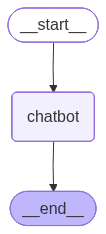

In [3]:
# 可视化图（可选）
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [4]:
# 运行聊天机器人
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User:  你好，我是kissyoudyb


Assistant: 你好，kissyoudyb！很高兴认识你。有什么我可以帮助你的吗？无论是有关技术、生活小贴士还是其他任何问题，我都会尽力提供帮助。


User:  我是谁？


Assistant: 您好！您是使用这个平台的用户，但我无法知道您的具体身份信息，因为我们的对话是匿名且保护隐私的。如果您想分享更多关于自己的信息，我很乐意了解更多！这样我也可以更好地为您提供帮助。


User:  q


Goodbye!


#### 2.2.2 添加工具

安装使用Tavily 搜索引擎

In [ ]:
# !pip install -U langchain-tavily

In [7]:
from langchain_tavily import TavilySearch
import os

os.environ["TAVILY_API_KEY"] = ""
tavily_search = TavilySearch(max_results=2)
tools = [tavily_search]
tavily_search.invoke("What's a 'node' in LangGraph?")

{'query': "What's a 'node' in LangGraph?",
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://dev.to/raunaklallala/understanding-core-concepts-of-langgraph-deep-dive-1d7h',
   'title': 'Understanding Core Concepts of LangGraph (Deep Dive)',
   'content': 'At the core, LangGraph has three simple but powerful building blocks: **Nodes, Edges, and State**. Each of those is a *Node*. In LangGraph, a Node can be many things:. Each Node is like a worker with a simple contract: it takes an input, does its piece of the job, and pushes out an output. **Analogy:** Nodes are like “stations” on a metro map. **Analogy:** If Nodes are stations, Edges are the railway tracks. * Shared state → memory that’s accessible to *all* nodes during execution. * **Node 1:** Input Capture → User enters “Hello World.”. * Edges: If skills gap detected → route to skill-gap explainer node. Once you start thinking in terms of Nodes, Edges, and State, you realize this is less abo

In [8]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

from langgraph.prebuilt import tools_condition, ToolNode

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

# Modification: tell the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode([tavily_search])
graph_builder.add_node("tools", tool_node)

In [9]:
def route_tools(
    state: State,
):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END


graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    {"tools": "tools", END: END},
)

graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

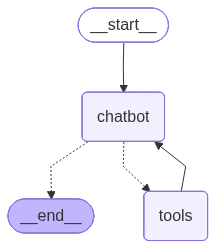

In [10]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [11]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User:  请给我解释下什么是LangGraph?


Assistant: 
Assistant: {"query": "什么是LangGraph", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://docs.feishu.cn/article/wiki/AbVKwYChviAm5dk2GSScxgXZnhd", "title": "LangGraph，知多少？ - 飞书文档", "content": "LangGraph 是LangChain 生态系统中一颗崭新的创新之星，为构建基于LLM （大语言模型）的有状态、多代理应用程序提供了一个全新的范式和强大的框架支持。作为一个专注于AI 辅助", "score": 0.9220975, "raw_content": null}, {"url": "https://zhuanlan.zhihu.com/p/1945401093786940263", "title": "LangGraph 深度解析：构建可靠、可控的AI Agent 框架 - 知乎专栏", "content": "一、LangGraph 是什么？ LangGraph 是一个用于构建有状态、多角色应用的低级编排框架。它的核心理念是将Agent 工作流建模为图（Graph），其中：. 节点", "score": 0.9174287, "raw_content": null}], "response_time": 0.72, "request_id": "06e32af0-6f5b-4aff-90f3-d442d3135fe2"}
Assistant: LangGraph 是LangChain 生态系统中的一个创新框架，它为基于大语言模型（LLM）构建有状态、多代理应用程序提供了一个全新的范式。简而言之，LangGraph 致力于成为开发可靠且可控的AI代理程序的强有力工具。其核心理念是将Agent工作流建模成图（Graph），其中节点代表不同的处理步骤或角色，而边则表示这些节点之间的交互和依赖关系。

通过这种方式，LangGraph 使得开发者能够更加直观地理解和控制复杂的AI系统行为，从而更容易创建出既强大又易于管理的应用程序。

参考资料：
- [飞书文档 - LangGraph

User:  q


Goodbye!


#### 2.2.3 添加记忆

聊天机器人现在可以使用工具来回答用户的问题，但它无法记住之前交互的上下文。这限制了它进行连贯、多轮对话的能力。

LangGraph 通过持久化检查点checkpointer解决了这个问题。如果您在编译图时提供，并thread_id在调用图时提供 ，LangGraph 会在每一步之后自动保存状态。当您再次使用相同的调用图时thread_id，图会加载其已保存的状态，从而允许聊天机器人从上次中断的地方继续执行。

In [12]:
from langgraph.checkpoint.memory import InMemorySaver

# 这是内存检查点，这对于本教程来说很方便。
# 但是，在生产应用程序中，需要将其更改为使用SqliteSaver、PostgresSaver 或 RedisSaver数据库。
memory = InMemorySaver()

graph = graph_builder.compile(checkpointer=memory)

In [13]:
# 与聊天机器人互动
config = {"configurable": {"thread_id": "1"}}

user_input = "Hi there! My name is kissyoudyb."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is kissyoudyb.
================================== Ai Message ==================================

Hello kissyoudyb! It's nice to meet you. How can I assist you today?


In [15]:
# 提出后续问题，看能否记得我是谁？

user_input = "Remember my name?"

config = {"configurable": {"thread_id": "1"}}
# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Remember my name?
================================== Ai Message ==================================

Of course! Your name is kissyoudyb. How can I assist you today, kissyoudyb?


## 3. 持久化状态

LangGraph 内置了一个持久化层，通过检查点(checkpointer)机制实现。当你使用检查点器编译图时，它会在每个超级步骤(super-step)自动保存图状态的检查点。这些检查点被存储在一个线程(thread)中，可在图执行后随时访问。由于线程允许在执行后访问图的状态，因此实现了人工介入（human-in-the-loop）、记忆（memory）、时间回溯（time travel）和容错（fault-tolerance）等强大功能。

### 3.1 什么是记忆（Memory）

记忆是一种认知功能，允许人们存储、检索和使用信息来理解他们的现在和未来。通过记忆功能，代理可以从反馈中学习，并适应用户的偏好。

- **短期记忆（Short-term memory）** 或称为线程范围内的记忆，可以在与用户的单个对话线程中的任何时间被回忆起来。LangGraph将短期记忆管理为代理状态的一部分。状态会被使用检查点机制保存到数据库中，以便对话线程可以在任何时间恢复。当图谱被调用或者一个步骤完成时，短期记忆会更新，并且在每个步骤开始时读取状态。这种记忆类型使得AI能够在与用户的持续对话中保持上下文和连贯性，确保了交互的流畅性和效率。例如，在一系列的询问、回答或命令执行过程中，用户无需重复之前已经提供的信息，因为AI能够记住这些细节并根据需要利用这些信息进行响应或进一步的操作。这对于提升用户体验，尤其是复杂任务处理过程中的体验至关重要。

- **长期记忆（Long-term memory）** 是在多个对话线程之间共享的。它可以在任何时间、任何线程中被回忆起来。记忆的范围可以限定在任何自定义命名空间内，而不仅仅局限于单个线程ID。LangGraph提供了存储机制，允许您保存和回忆长期记忆。
这种记忆类型使得AI能够在不同对话或用户交互中保留和利用信息。例如，用户的偏好、历史记录或特定的上下文信息可以跨会话保存下来，并在未来的任何交互中被调用。这种方式为用户提供了一种无缝体验，无论他们何时或以何种方式与AI交互，AI都能根据过去的信息做出更个性化、更智能的响应。这对于构建深度用户关系和增强系统适应性至关重要。

<img src="./assets/1.jpg">

### 3.2 持久化（Persistence）

许多AI应用需要记忆功能来在多次交互中共享上下文。在LangGraph中，这种类型的记忆可以通过线程级别的持久化添加到任何StateGraph中。
通过使用线程级别的持久化，LangGraph允许AI在与用户的连续对话或交互过程中保持信息的连贯性和一致性。这意味着，在一个交互中获得的信息可以被保存并在后续的交互中使用，极大地提升了用户体验。例如，用户在一个会话中表达的偏好可以在下一个会话中被记住和引用，使得交互更加个性化和高效。这种方法对于需要处理复杂或多步骤任务的应用特别有用，因为它确保了用户无需重复提供相同的信息，同时也让AI能够更好地理解和响应用户的需求。

## 4. LangGraph 中使用 Memory

In [16]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.checkpoint.memory import MemorySaver

# 创建 Graph
# MessagesState 是一个 State 内置对象，add_messages 是内置的一个方法，将新的消息列表追加在原列表后面
graph_builder = StateGraph(MessagesState)

In [17]:
# 定义一个执行节点
# 输入是 State，输出是系统回复
def chatbot(state: MessagesState):
    # 调用大模型，并返回消息（列表）
    # 返回值会触发状态更新 add_messages
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

# 为了添加持久性，我们需要在编译图表时传递检查点。使用 MemorySaver 就可以记住以前的消息！
graph = graph_builder.compile(checkpointer = MemorySaver())

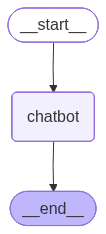

In [18]:
from IPython.display import Image, display

# 可视化展示这个工作流
try:
    display(Image(data=graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [19]:
config = {"configurable": {"thread_id": "1"}}
input_message = {"role": "user", "content": "hi! I'm kissyoudyb"}
for chunk in graph.stream({"messages": [input_message]}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

hi! I'm kissyoudyb
================================== Ai Message ==================================

Hello kissyoudyb! It's nice to meet you. How can I assist you today? Is there anything specific you'd like to know or discuss?


In [20]:
input_message = {"role": "user", "content": "what's my name?"}
for chunk in graph.stream({"messages": [input_message]}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

what's my name?
================================== Ai Message ==================================

Your name is kissyoudyb! Is there anything else you'd like to chat about or any questions you have?


如果我们想开始一个新的对话，可以通过传递不同的会话标识符或配置来实现。这意味着为新的交互创建一个独立的上下文，确保新对话不会受到之前对话状态的影响，从而保持数据和记忆的隔离。但是这样所有记忆都会消失！

In [21]:
input_message = {"role": "user", "content": "what's my name?"}
for chunk in graph.stream(
    {"messages": [input_message]},
    {"configurable": {"thread_id": "2"}},
    stream_mode="values",
):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

what's my name?
================================== Ai Message ==================================

I'm sorry, but I don't have the ability to know your name as our conversation is anonymous and I don't have access to any personal information about you unless you choose to share it. If you'd like to tell me your name, I'd be happy to use it in our conversation!


## 5. LangGraph 中使用 InMemoryStore

InMemoryStore是一个基于内存的存储系统，用于在程序运行时临时保存数据。它通常用于快速访问和存储短期记忆或会话数据。我们可以使用使用 langgraph 和 langchain_openai 库来创建一个基于内存的存储系统(InMemoryStore)，并结合 OpenAI 的嵌入模型 (OpenAIEmbeddings) 来处理嵌入向量。

大家可能有疑惑，我们不是用了MemorySaver持久化消息吗，为啥还要用InMemoryStore，他们的主要区别在于数据的持久性和应用场景。InMemoryStore主要用于短期、临时的数据储，强调快速访问；而MemorySaver则侧重于将数据从临时存储转移到持久存储，确保数据可以在多次程序执行间保持不变。在我们设计系统时，可以根据具体需求选择合适的存储策略。对于只需要在会话内保持的数据，可以选择InMemoryStore；而对于需要长期保存并能够在不同会话间共享的数据，则应考虑使用MemorySaver或其他形式的持久化存储解决方案。

下面给大家展示一个结合两种方式的例子，我们实现了一个对话模型的调用逻辑，通过从存储系统中检索与用户相关的记忆信息并将其作为上下文传递给模型，同时支持根据用户指令存储新记忆，确保每个用户的记忆数据独立且自包含，从而提升对话的个性化和连贯性。

In [22]:
from langgraph.store.memory import InMemoryStore
from langchain_community.chat_models.tongyi import ChatTongyi
from langchain_community.embeddings import DashScopeEmbeddings

in_memory_store = InMemoryStore(
    index={
        "embed": DashScopeEmbeddings(model="text-embedding-v1"),
        "dims": 1536,
    }
)

import uuid
from typing import Annotated
from typing_extensions import TypedDict

from langchain_core.runnables import RunnableConfig
from langgraph.graph import StateGraph, MessagesState, START
from langgraph.checkpoint.memory import MemorySaver
from langgraph.store.base import BaseStore

from langchain.chat_models import init_chat_model

model = ChatTongyi(model="qwen-max")

def call_model(state: MessagesState, config: RunnableConfig, *, store: BaseStore):
    user_id = config["configurable"]["user_id"]
    namespace = ("memories", user_id)
    memories = store.search(namespace, query=str(state["messages"][-1].content))
    info = "\n".join([d.value["data"] for d in memories])
    system_msg = f"You are a helpful assistant talking to the user. User info: {info}"

    # Store new memories if the user asks the model to remember
    last_message = state["messages"][-1]
    if "remember" in last_message.content.lower():
        memory = "User name is kissyoudyb"
        store.put(namespace, str(uuid.uuid4()), {"data": memory})

    response = model.invoke(
        [{"role": "system", "content": system_msg}] + state["messages"]
    )
    return {"messages": response}


builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")
graph = builder.compile(checkpointer=MemorySaver(), store=in_memory_store)

In [24]:
config = {"configurable": {"thread_id": "1", "user_id": "1"}}
input_message = {"role": "user", "content": "Hi! Remember: my name is kissyoudyb"}
for chunk in graph.stream({"messages": [input_message]}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

Hi! Remember: my name is kissyoudyb
================================== Ai Message ==================================

Got it! Thanks for the correction. Nice to meet you, kissyoudyb! How can I assist you today?


In [25]:
# 我们先改变一下config，使用一个新的线程，用户保持不变
config = {"configurable": {"thread_id": "2", "user_id": "1"}}
input_message = {"role": "user", "content": "what is my name?"}
for chunk in graph.stream({"messages": [input_message]}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

what is my name?
================================== Ai Message ==================================

Your username is kissyoudyb. If you're asking for your real name, I don't have that information since we're focused on maintaining your privacy and security. Is there anything else I can help you with?


In [26]:
# 现在，我们可以检查我们的store，并验证我们实际上已经为用户保存了记忆：

for memory in in_memory_store.search(("memories", "1")):
    print(memory.value)

{'data': 'User name is kissyoudyb'}
{'data': 'User name is kissyoudyb'}


In [27]:
# 现在，让我们为另一个用户运行这个图，以验证关于第一个用户记忆是独立且自包含的。

config = {"configurable": {"thread_id": "3", "user_id": "2"}}
input_message = {"role": "user", "content": "what is my name?"}
for chunk in graph.stream({"messages": [input_message]}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

what is my name?
================================== Ai Message ==================================

I'm sorry, but I don't have access to your personal information, including your name. To protect your privacy, I only know what you tell me during our conversation. If you'd like to share your name, feel free to do so!


## 6. 实现RAG

In [ ]:
# !pip install pymupdf
# !pip install faiss-cpu

In [28]:
from langchain_community.embeddings import DashScopeEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import PyMuPDFLoader

# 加载文档
loader = PyMuPDFLoader("./data/deepseek-v3-1-4.pdf")
pages = loader.load_and_split()

# 文档切分
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=512,
    chunk_overlap=200,
    length_function=len,
    add_start_index=True,
)

texts = text_splitter.create_documents(
    [page.page_content for page in pages[:2]]
)

# 灌库
embeddings = DashScopeEmbeddings(model="text-embedding-v1")
db = FAISS.from_documents(texts, embeddings)

# 检索 top-5 结果
retriever = db.as_retriever(search_kwargs={"k": 5})

In [30]:
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate

# Prompt模板
template = """请根据对话历史和下面提供的信息回答上面用户提出的问题:
{query}
"""
prompt = ChatPromptTemplate.from_messages(
    [
        HumanMessagePromptTemplate.from_template(template),
    ]
)

In [31]:
def retrieval(state: MessagesState):
    user_query = ""
    if len(state["messages"]) >= 1:
        # 获取最后一轮用户输入
        user_query = state["messages"][-1]
    else:
        return {"messages": []}
    # 检索
    docs = retriever.invoke(str(user_query))
    # 填 prompt 模板
    messages = prompt.invoke("\n".join([doc.page_content for doc in docs])).messages
    return {"messages": messages}

In [32]:
graph_builder = StateGraph(MessagesState)
graph_builder.add_node("retrieval", retrieval)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "retrieval")
graph_builder.add_edge("retrieval","chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

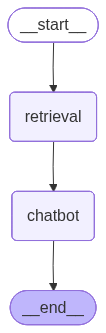

In [33]:
from IPython.display import Image, display

# 可视化展示这个工作流
try:
    display(Image(data=graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

## 7. 加入分支：若找不到答案则转人工处理

In [35]:
from langchain_core.messages import HumanMessage
from typing import Literal
from langgraph.types import interrupt, Command

# 校验
def verify(state: MessagesState)-> Literal["chatbot","ask_human"]:
    message = HumanMessage("请根据对话历史和上面提供的信息判断，已知的信息是否能够回答用户的问题。直接输出你的判断'Y'或'N'")
    ret = llm.invoke(state["messages"]+[message])
    if 'Y' in ret.content:
        return "chatbot"
    else:
        return "ask_human"

# 人工处理
def ask_human(state: MessagesState):
    user_query = state["messages"][-2].content
    human_response = interrupt(
       {
          "question": user_query
       }
    )
    # Update the state with the human's input or route the graph based on the input.
    return {
        "messages": [AIMessage(human_response)]
    }

In [36]:
from langgraph.checkpoint.memory import MemorySaver

# 用于持久化存储 state (这里以内存模拟）
# 生产中可以使用 Redis 等高性能缓存中间件
memory = MemorySaver()

graph_builder = StateGraph(MessagesState)

graph_builder.add_node("retrieval", retrieval)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("ask_human", ask_human)

graph_builder.add_edge(START, "retrieval")
graph_builder.add_conditional_edges("retrieval", verify)
graph_builder.add_edge("ask_human", END)
graph_builder.add_edge("chatbot", END)

# 中途会被转人工打断，所以需要 checkpointer 存储状态
graph = graph_builder.compile(checkpointer=memory)

In [39]:
from langchain_core.messages import AIMessage 

# 当使用 checkpointer 时，需要配置读取 state 的 thread_id
# 可以类比 OpenAI Assistants API 理解，或者想象 Redis 中的 key
thread_config = {"configurable": {"thread_id": "100"}}

def stream_graph_updates(user_input: str):
    # 向 graph 传入一条消息（触发状态更新 add_messages）
    for event in graph.stream(
        {"messages": [{"role": "user", "content": user_input}]},
        thread_config
    ):
        for value in event.values():
            if isinstance(value, tuple):
                return value[0].value["question"]
            elif "messages" in value and isinstance(value["messages"][-1], AIMessage):
                print("Assistant:", value["messages"][-1].content)
                return None
    return None

def resume_graph_updates(human_input: str):
    for event in graph.stream(
        Command(resume=human_input), thread_config, stream_mode="updates"
    ):
        for value in event.values():
            if "messages" in value and isinstance(value["messages"][-1], AIMessage):
                print("Assistant:", value["messages"][-1].content)
def run():
    # 执行这个工作流
    while True:
        user_input = input("User: ")
        if user_input.strip() == "":
            break
        question = stream_graph_updates(user_input)
        if question:
            human_answer = input("Ask Human: "+question+"\nHuman: ")
            resume_graph_updates(human_answer)

In [40]:
run()

User:  deepseek v3有多少参数？


Assistant: DeepSeek-V3 是一个强大的混合专家（Mixture-of-Experts, MoE）语言模型，总共有 671 亿参数，对于每个 token 激活的参数为 37 亿。这种设计旨在实现高效的推理和成本效益高的训练。


User:  你确定是671亿参数吗？


Assistant: 是的，DeepSeek-V3 的总参数量为 671 亿参数，其中每个 token 激活的参数为 37 亿。这是根据提供的信息确认的。如果你有其他具体问题或需要进一步的详细信息，请告诉我！


User:  qwen3有多少参数？
Ask Human: qwen3有多少参数？
Human:  238B参数


Assistant: 238B参数


User:  q
Ask Human: q
Human:  


Assistant: 


User:  


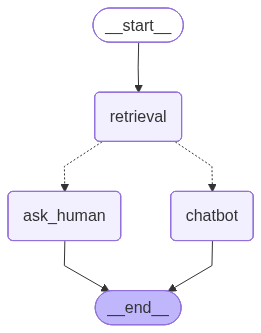

In [41]:
from IPython.display import Image, display

# 可视化展示这个工作流
try:
    display(Image(data=graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

LangGraph 还支持：

- 工具调用
- 并行处理
- 状态持久化
- 对话历史管理
- 历史动作回放（用于调试与测试）
- 子图管理
- 多智能体协作
- MCP
- ......
  
更多关于 LangGraph 的 HowTo，参考官方文档：https://langchain-ai.github.io/langgraph/how-tos